In [114]:
import numpy as np
import random as r
uniform_=r.uniform
gauss_=r.gauss

dim=3

def uniform(a=0, b=1):
    return uniform_(a, b)


def gauss(a=0.0, d=0.05):
    ret=-1
    while ret<0 or ret>1:
        ret=gauss_(a, d)
    return ret

def normMax1(pt):
    mr=1e6
    for v in pt:
        if v!=0:
            if 1.0/v<mr:
                mr=1.0/v
    return [v*mr for v in pt]

def normMax2(pt):
    ret=0.0
    for v in pt:
        ret+=v*v
    r=(1.0/ret)**0.5
    return [v*r for v in pt]

In [172]:
# generate 5 point 
#     generate a point in [0, 1]^d
pv_num=5
aps=[]

# for _ in range(pv_num):
#     ap=[uniform() for _ in range(dim)]
#     aps.append(normMax1(ap))
# aps.append([0.1, 1.0])
# aps.append([0.5, 1.0])
# aps.append([1.0, 1.0])
# aps.append([1.0, 0.5])
# aps.append([1.0, 0.1])
aps.append([0.1, 0.1, 0.9])
aps.append([0.1, 0.9, 0.1])
aps.append([0.9, 0.1, 0.1])
aps.append([0.1, 0.9, 0.7])
aps.append([0.9, 0.1, 0.7])
print(aps[0])
newaps=[]
for ap in aps:
    newaps.append(normMax1(ap))
aps=newaps
print(aps[0])


def check(pt):
    for v in pt:
        if v<=0 or v>=1:
            return False
    return True

def corr(ept, num):
    ret=[]
    while len(ret)<num:
        ratio=gauss(a=0.5, d=0.2)
        pt=[i*ratio for i in ept]
        bias=[gauss_(0, 0.02) for _ in range(dim)]
        newpt=[i+j for i,j in zip(pt, bias)]
        if check(newpt):
            ret.append(newpt)
    return ret

    

[0.1, 0.1, 0.9]
[0.11111111111111112, 0.11111111111111112, 1.0]


In [173]:
# num=1000
# clusters=[]
# for ap in aps:
#     clusters+=corr(ap, num)
    
nums=[200, 1300, 2000, 200, 1300]
clusters=[]
for ap,num in zip(aps, nums):
    clusters+=corr(ap, num)
print(clusters[0])

[0.0632445477118694, 0.07660167201879221, 0.8389621642529077]


[1.0, 0.4353368802239837, 0.09989033153207408]
[0.9999999999999999, 0.667574242580226, 0.497522066281624]
[0.44624373963656344, 0.7238813395785981, 1.0]
[0.681757906715519, 0.6201265159337181, 1.0]
[0.8695702695006202, 0.25626119133164327, 0.9999999999999999]


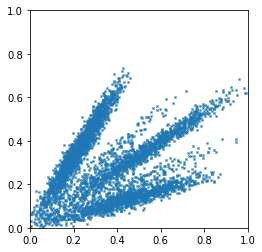

In [96]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca()
for ap in aps:
    print(ap)
array=np.array(clusters)
ax.plot([i[0] for i in clusters], [i[1] for i in clusters], 'x', markersize=2)
ax.axis((0, 1, 0, 1))
ax.set_aspect('equal') 

plt.show()

[0.0632445477118694, 0.07660167201879221, 0.8389621642529077]


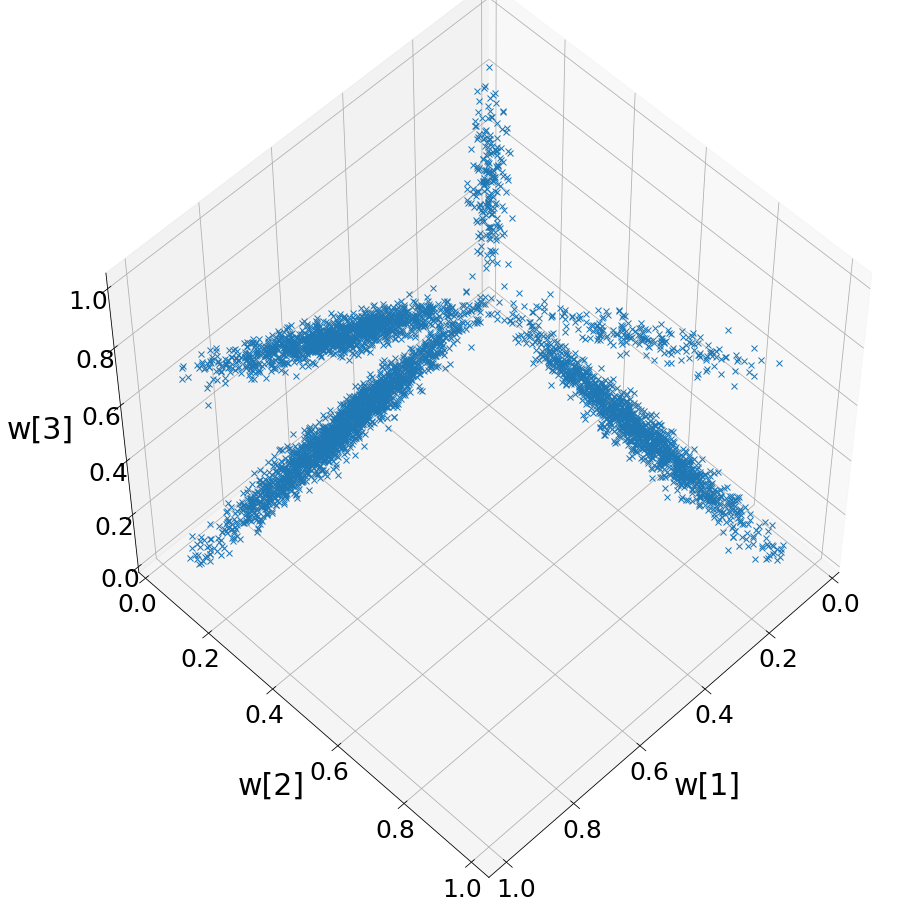

In [174]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.view_init(azim=45, elev=90*np.arccos(1.0/(3.0**0.5))/(np.pi/2))
ax.set_xlabel('w[1]', fontsize=30, labelpad=30)
ax.set_ylabel('w[2]', fontsize=30, labelpad=30)
ax.set_zlabel('w[3]', fontsize=30, labelpad=30)
ax.tick_params('x', labelsize=25)
ax.tick_params('y', labelsize=25)
ax.tick_params('z', labelsize=25)
ax.set(xlim=(0, 1.03), ylim=(0, 1.03), zlim=(0, 1.03))
print(clusters[0])
ax.plot([i[0] for i in clusters], [i[1] for i in clusters], [i[2] for i in clusters] , 'x')
plt.show()

In [143]:
wfile = 'cs5cluster5K3d_5avsp.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(clusters)), clusters):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()

In [175]:
wfile = 'cs5cluster5K3d_5mmsqr.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(clusters)), clusters):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("%.6f "%(v[2]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()